<a href="https://colab.research.google.com/github/sapanapawar/Health-Insurance-Cross-Sell-Prediction/blob/main/HEALTH_INSURANCE_CROSS_SELL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# **Attribute Information**

1. id :	Unique ID for the customer

2. Gender	: Gender of the customer

3. Age :	Age of the customer

4. Driving_License	0 : Customer does not have DL, 1 : Customer already has DL

5. Region_Code :	Unique code for the region of the customer

6. Previously_Insured	: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

7. Vehicle_Age :	Age of the Vehicle

8. Vehicle_Damage	 :1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

9. Annual_Premium	: The amount customer needs to pay as premium in the year

10. PolicySalesChannel :	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

11. Vintage :	Number of Days, Customer has been associated with the company

12. Response :	1 : Customer is interested, 0 : Customer is not interested

#Loading the Required Libraries and Modules


In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

import matplotlib.pyplot as plt
%matplotlib inline

#Importing Modules
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_auc_score, f1_score, recall_score, roc_curve, classification_report, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

#Mount drive & load the dataset

In [2]:
#Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Working directory path
file_path = '/content/drive/MyDrive/pd csv file/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv'

In [4]:
#Reading the dataset
df = pd.read_csv(file_path)

#Data Exploration

In [5]:
#Let's how the dataset look like
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [6]:
#Observing first five rows
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
#Observing last five rows
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [8]:
#Checking for number of rows and columns
df.shape

(381109, 12)

Dataset has 381109 rows and 12 columns. 

In [9]:
#Let's see the descriptive summary 
df.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109,381109.000000,381109.000000,381109.000000,381109.000000,381109,381109,381109.000000,381109.000000,381109.000000,381109.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,206089,NaN,NaN,NaN,NaN,200316,192413,NaN,NaN,NaN,NaN
mean,190555.000000,NaN,38.822584,0.997869,26.388807,0.458210,NaN,NaN,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,NaN,15.511611,0.046110,13.229888,0.498251,NaN,NaN,17213.155057,54.203995,83.671304,0.327936
min,1.000000,NaN,20.000000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,NaN,25.000000,1.000000,15.000000,0.000000,NaN,NaN,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,NaN,36.000000,1.000000,28.000000,0.000000,NaN,NaN,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,NaN,49.000000,1.000000,35.000000,1.000000,NaN,NaN,39400.000000,152.000000,227.000000,0.000000


In [10]:
#Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [11]:
#Looking for duplicates
df.duplicated().sum()

0

There are no duplicates present in the dataset.

#Checking for Null/NaN/Missing Values

In [12]:
#Checking for is their any null value present or not
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There is no missing value present in the dataset.

#Checking for Outliers

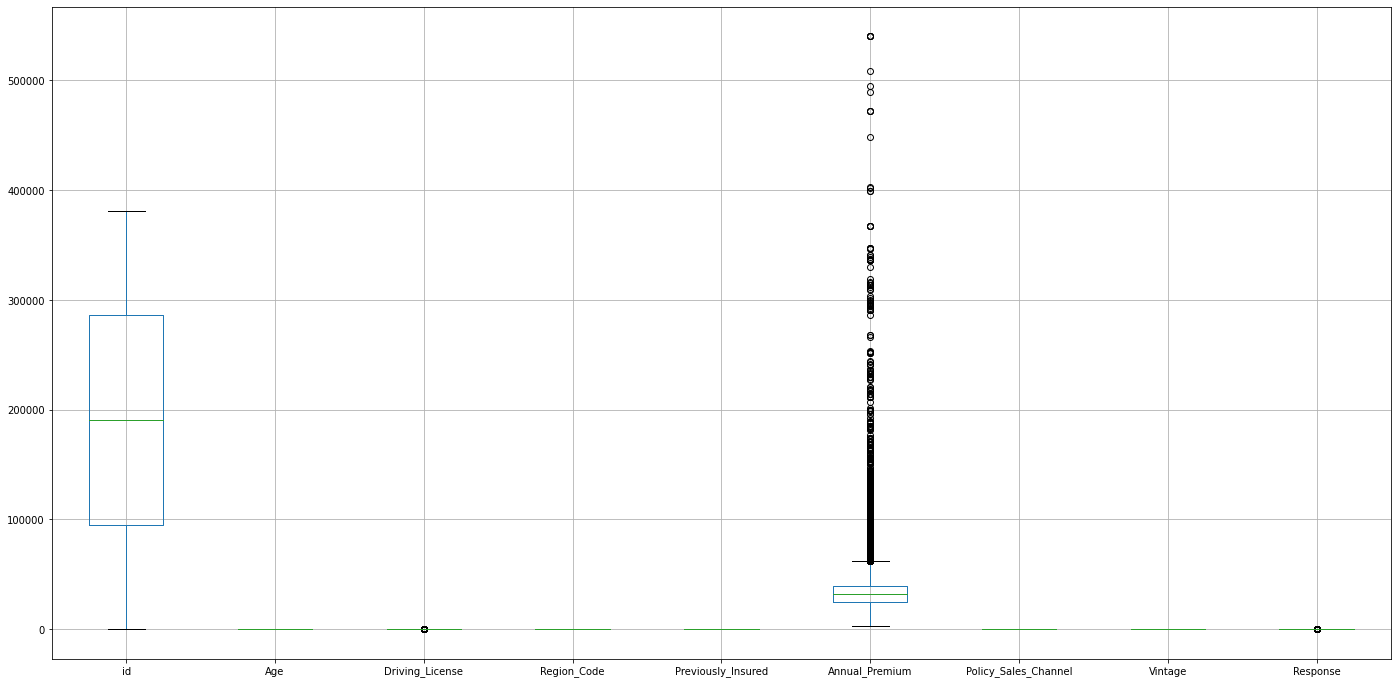

In [13]:
#Checking for outliers by plotting boxplot
fig = plt.figure(figsize =(24, 12))
df.boxplot()

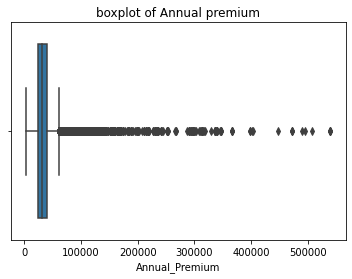

In [14]:
#Plotting boxplot of Annual_Premium
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()



*   From the boxplot we can observe lot of outliers in the variable 'Annual_Premium'. So we have to remove the outliers.



In [15]:
#Removing Outliers using IQR
def outliers(df, variable, distance):
     IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
     lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
     upper_boundary = df[variable].quantile(0.75) + (IQR * distance) 
        
     return upper_boundary, lower_boundary
    
upper_limit, lower_limit = outliers(df, 'Annual_Premium', 1.5)
upper_limit, lower_limit 

(61892.5, 1912.5)

In [16]:
df['Annual_Premium']= np.where(df['Annual_Premium'] > upper_limit, upper_limit, 
                                 np.where(df['Annual_Premium'] < lower_limit, lower_limit, df['Annual_Premium']))

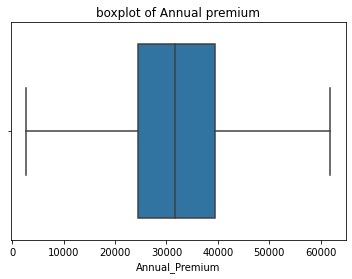

In [17]:
#Plotting boxplot after removing outliers
sns.boxplot(df['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()

In [18]:
df.shape

(381109, 12)

In [19]:
df['Annual_Premium'].isnull().sum()

0

#Data Visualization

#Target Variable

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


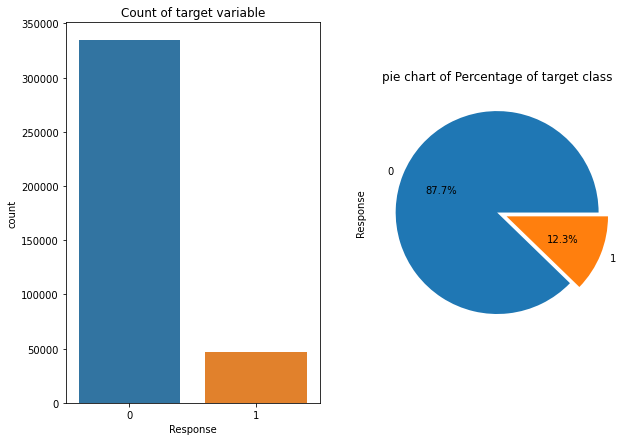

In [20]:
#Plotting the count of Response
plt.subplot(1, 2, 1)
sns.countplot(df['Response'])
plt.title("Count of target variable")

#Plotting the percentage of Response
plt.subplot(1,2,2)
count = df['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%', figsize = (10,7),explode = [0,0.1], title = "pie chart of Percentage of target class")
print( "Percentage of target class\n")
print(df['Response'].value_counts()/len(df)*100)


*   The target variable is highly imbalanced.

*   By the plot we can say that this is imbalance binary classification problem.

*   The customers interested in insurance is 87 % as compared to the other one.




#Univariate Analysis Of Categorical Variables

In [21]:
#Categorical Variables
cat_var = ['Vehicle_Age', 'Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Damage', 'Response' ]

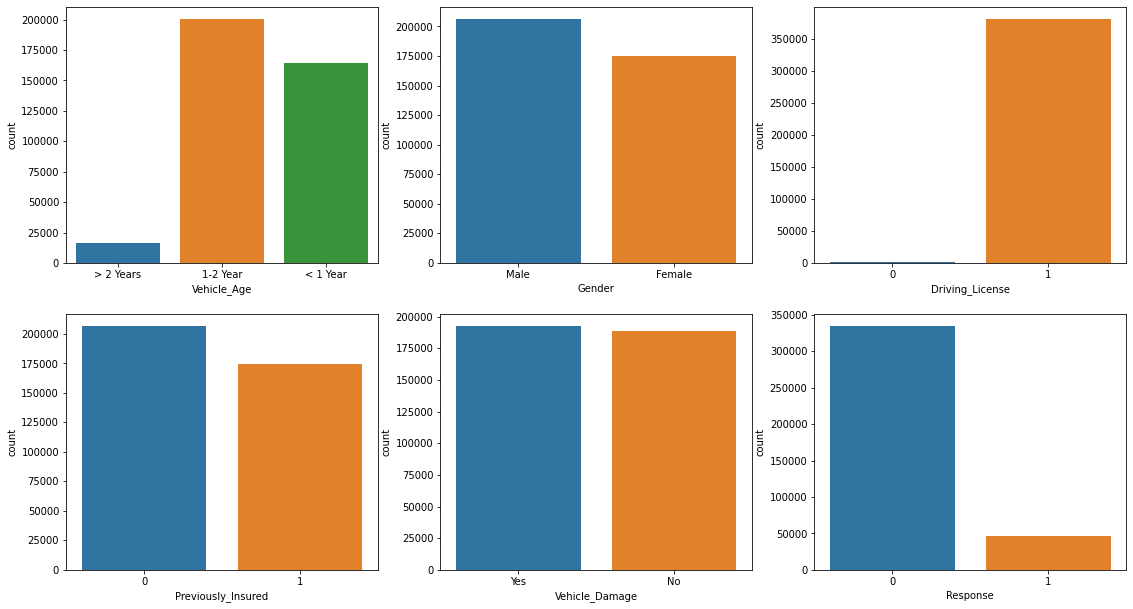

In [22]:
#Plotting count plot of every categorical variable
plt.figure(figsize=(19, 16))
plt.subplot(3,3,1)
sns.countplot(df['Vehicle_Age'])
plt.subplot(3,3,2)
sns.countplot(df['Gender'])
plt.subplot(3,3,3)
sns.countplot(df['Driving_License'])
plt.subplot(3,3,4)
sns.countplot(df['Previously_Insured'])
plt.subplot(3,3,5)
sns.countplot(df['Vehicle_Damage'])
plt.subplot(3,3,6)
sns.countplot(df['Response'])

Observations :

*  The plot shows that most of the vehicle taken in this study is 1-2 years old.There is very less number of customers with vehicle age less than 2 years.

*   The gender variable in the dataset is almost equally distributed.

*   Almost all people have driving license.


*   There are more number of people who have no previous insurance policy than the other one.


*   Customers with vehicle damage Yes and NO are equally distributed.

*   We can say that most of the customers are not interested in vehicle insurance policy.



#Bivariate Analysis Of Categorical Variables with Target Variable

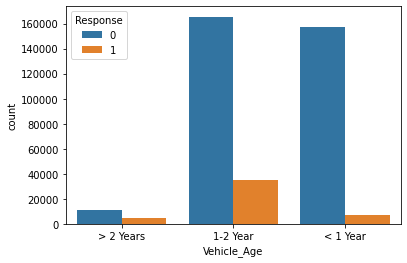

In [23]:
#Plotting the count plot of Vehicle_Age vs Response
sns.countplot(x ='Vehicle_Age', hue='Response',data =df)

Customers with vechicle age 1-2 years are more likely to interested in insurence as compared to the other two.

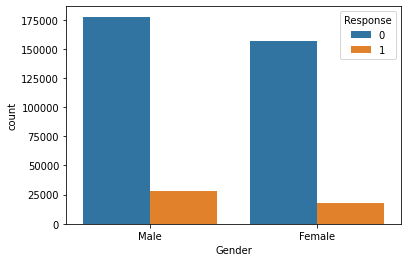

In [24]:
#Plotting the count plot of Gender vs Response
sns.countplot(x ='Gender', hue='Response',data = df)

Male category is slightly greater than that of female and chances of buying the insurance is also little high.

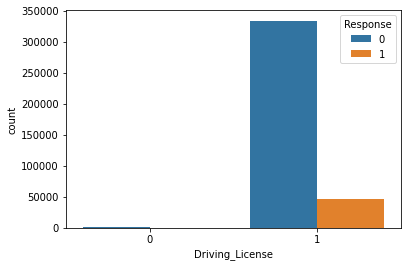

In [25]:
#Plotting the count plot of Driving_License vs Response
sns.countplot(x ='Driving_License', hue='Response',data =df)

Customers who are interested in Vehicle Insurance almost all have driving license.

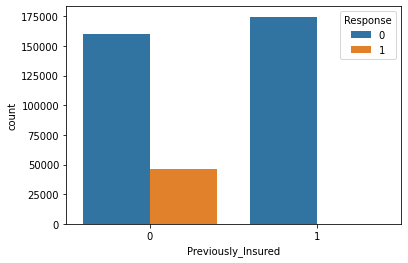

In [26]:
#Plotting the count plot of Previously_Insured vs Response
sns.countplot(x ='Previously_Insured', hue='Response',data =df)

From the plot we can say that almost 175000 people was previously insured but their current response is NO.

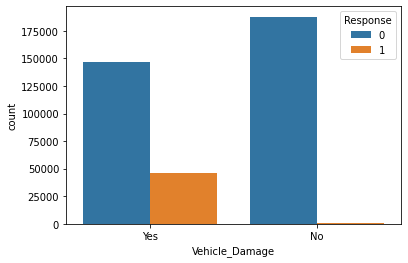

In [27]:
#Plotting the count plot of Vehicle_Damage vs Response
sns.countplot(x ='Vehicle_Damage', hue='Response',data =df)

Customers with vechicle damage are more interested in Vehicle Insurance.



#Univariate Analysis Of Continuous Variables

In [28]:
con_data = ['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']

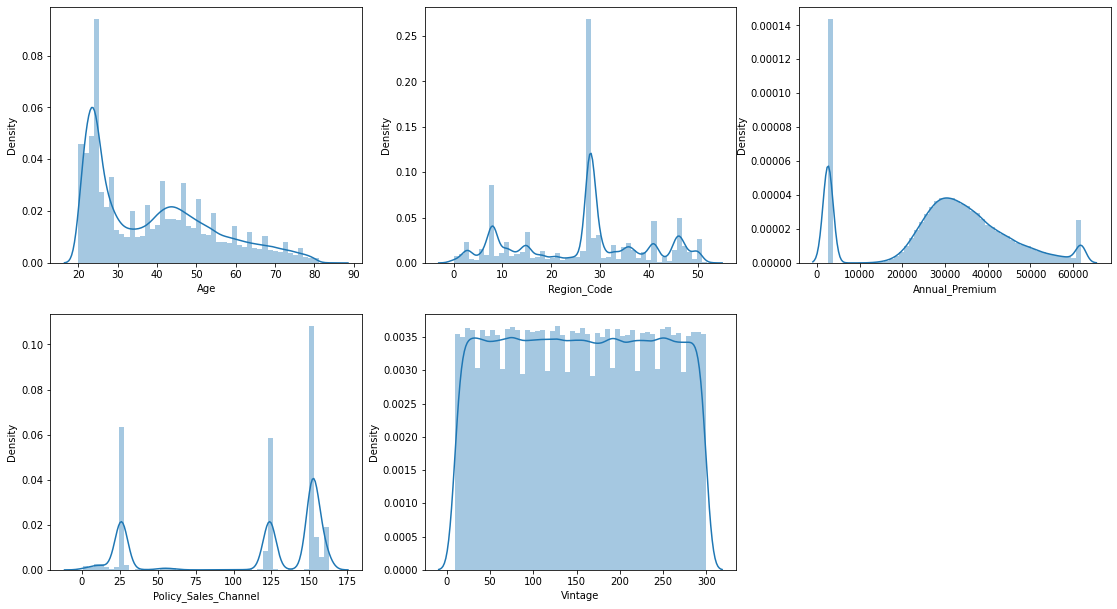

In [29]:
#Plotting the distribution plot of continuous variables
plt.figure(figsize=(19, 16))
plt.subplot(3,3,1)
sns.distplot(df['Age'])
plt.subplot(3,3,2)
sns.distplot(df['Region_Code'])
plt.subplot(3,3,3)
sns.distplot(df['Annual_Premium'])
plt.subplot(3,3,4)
sns.distplot(df['Policy_Sales_Channel'])
plt.subplot(3,3,5)
sns.distplot(df['Vintage'])

Observations:


*   The Column Age is highly skewed towards right.

*   The Column Region Code is randomly distributed.The indivisuals with region code 28 the highest as compared to the other ones.

*   The column Annual Premium normaly distributed with little right skewed.

*   The variable Policy Sales Channel is randomly distributed with hueness.


*   The variable Vintage is uniformly distributed.




#Bivariate Analysis Of Continous Variables with Target Variable

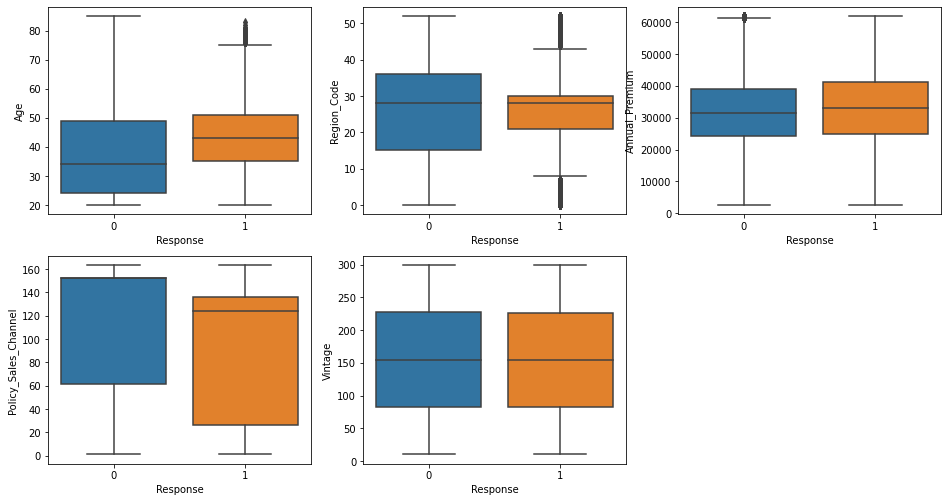

In [30]:
#Plotting box plots of continous variables with Target Variable
plt.figure(figsize=(16, 13))
plt.subplot(3,3,1)
sns.boxplot(df['Response'], df['Age'])
plt.subplot(3,3,2)
sns.boxplot(df['Response'], df['Region_Code'])
plt.subplot(3,3,3)
sns.boxplot(df['Response'], df['Annual_Premium'])
plt.subplot(3,3,4)
sns.boxplot(df['Response'], df['Policy_Sales_Channel'])
plt.subplot(3,3,5)
sns.boxplot(df['Response'], df['Vintage'])
plt.show()

Conclusions :


*  The customers with maximum age are interested in the vehical insurence.


*  The region code does not affect on the vehical insurence.

*   Also the Annual Premium doesn't affect on vehical insurence i.e.it seem to have slighlty elevated Annual Premium with response yes or no.


*   The customers with response yes or no doesn't affect on variable vintage.









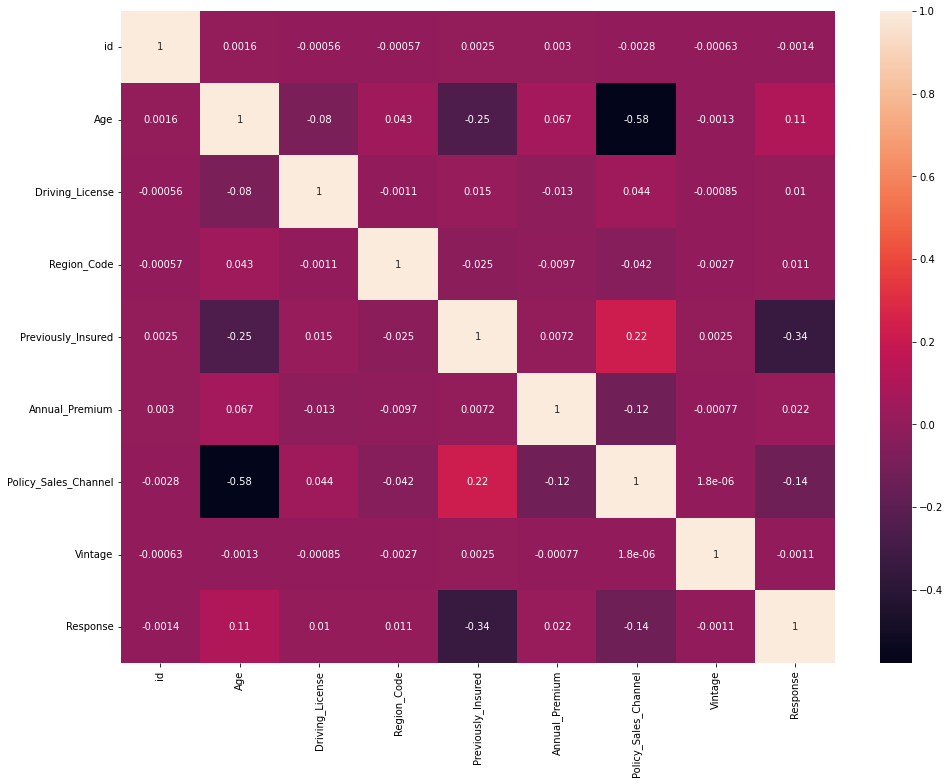

In [31]:
#Correlation Heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True)